# El diagrama Hertzsprung-Russell

## Resumen

El diagrama Hertzsprung-Russell (HR) resulta muy importante para entender y estudiar la evolución estelar tanto desde el punto de vista observacional como teórico. En él se pueden relacionar luminosidades o magnitudes absolutas de las estrellas con sus tipos espectrales, temperaturas efectivas o índices de color. Se pueden identificar claramente conjuntos de estrellas, que quedan determinados por las diferentes etapas de su evolución.

En esta práctica vamos a aprovechar algunas facilidades de visualización que nos brinda Python para
comprender mejor su importancia.

Recuerden leer la bibliografía accesible desde la Wiki de la materia.

#### Ejercicio 1.

Analice el diagrama Hertzsprung-Russell para la muestra de estrellas que se encuentra disponible en la página de la misión Nearby Stellar Systems Catalog for Exoplanet Imaging Missions1. La misma dispone de más de 2000 estrellas de hasta 30 pc de distancia y fue extraída del catálogo generado por Hipparcos. Puede consultar sus características principales en Turnbull (2015). Link: https://ui.adsabs.harvard.edu/abs/2015arXiv151001731T/abstract

In [3]:
import io
import pandas as pd

hr = pd.read_csv('TP8/Nstars_V3.csv', header=0)
# Dataset is now stored in a Pandas Dataframe 
# poniendo el nombre del Panda, me lo muestra
hr

,HIP,HD,GL/GJ,GL/LTT,COMMON,WDS,"sep("")",dM(mag),NPLANETS,RAhms,...,R*(Rsun),R_src,M*(Msun),M_src,log(g),log(g)_src,Age(Gyr),Age_src,AC-Gray,[Fe/H]-VF05
0,57,224789,___,___,___,___,___,___,___,00 00 40.39,...,0.91,Turnbull,0.82,Turnbull,4.48,Gray,___,___,A,___
1,169,224953,GJ 1294A,LTT 9859,___,00021-6817,___,___,___,00 02 08.41,...,0.63,Turnbull,0.53,Turnbull,___,___,___,___,___,___
2,171,224930,GL 914A,LHS 101,___,00022+2705,0.8,3.07,___,00 02 09.65,...,0.92,Turnbull,0.91,Turnbull,4.27,Gray,___,___,I,___
3,263,___,___,___,___,___,___,___,___,00 03 19.02,...,0.51,Turnbull,0.45,Turnbull,___,___,___,___,___,___
4,400,225261,G 130- 40,LTT 10010,___,___,___,___,___,00 04 56.08,...,0.80,Takeda,0.79,Takeda,4.54,Takeda,12.28,Takeda,I,-0.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2328,118278,224619,G 266- 21,LHS 4055,___,___,___,___,___,23 59 28.12,...,0.89,Turnbull,0.88,Turnbull,4.49,Gray,___,___,I,___
2329,118281,224635,___,___,___,23595+3343,2.4,0.26,___,23 59 29.33,...,1.77,Turnbull,1.24,Turnbull,___,___,___,___,___,___
2330,118310,224660,___,___,___,23598+0640,___,___,___,23 59 47.82,...,0.86,Turnbull,0.71,Turnbull,___,___,___,___,A,___
2331,120005,79211,GL 338B,G 195- 18,___,09144+5241,___,___,___,09 14 26.19,...,0.53,Takeda,0.55,Takeda,4.76,Takeda,___,___,___,___


In [4]:
# Me dice que tipo de variable tiene cada columna
hr.dtypes

HIP               int64
HD               object
GL/GJ            object
GL/LTT           object
COMMON           object
WDS              object
sep(")           object
dM(mag)          object
NPLANETS         object
RAhms            object
DEdms            object
RA(ICRS)        float64
DE(ICRS)        float64
pmRA            float64
pmDE            float64
Glon            float64
Glat            float64
d(pc)           float64
ePARX/PARX      float64
V               float64
e_V              object
V_src            object
B-V              object
e_B-V            object
B-V_src          object
Mv              float64
e_Mv             object
CombMag          object
V-K              object
e_V-K            object
K_src            object
Lbol_src         object
Lbol            float64
e_Lbol           object
SpType           object
CLASS            object
SPECTAG          object
EEID(AU)        float64
EEID(mas)       float64
FPB-Earth       float64
V-Earth(mag)    float64
Teff            

In [5]:
# forma de hacer estadísticas con las columnas
#
hr['B-V'].describe()

count     2333
unique     189
top       1.46
freq        52
Name: B-V, dtype: object

In [6]:
# como B-V es object, debemos convertirlo a número
df = pd.DataFrame(hr)
df['B-V'] = pd.to_numeric(df['B-V'], errors='coerce')
df['B-V'] = df['B-V'].astype(float)
#df['B-V'].plot(kind='bar')
df['B-V'].describe()

count    2324.000000
mean        1.021252
std         0.413506
min        -0.160000
25%         0.680000
50%         1.030000
75%         1.410000
max         3.200000
Name: B-V, dtype: float64

#### Realice un diagrama color-magnitud de todas las estrellas del catálogo e identifique las diferentes regiones presentes.


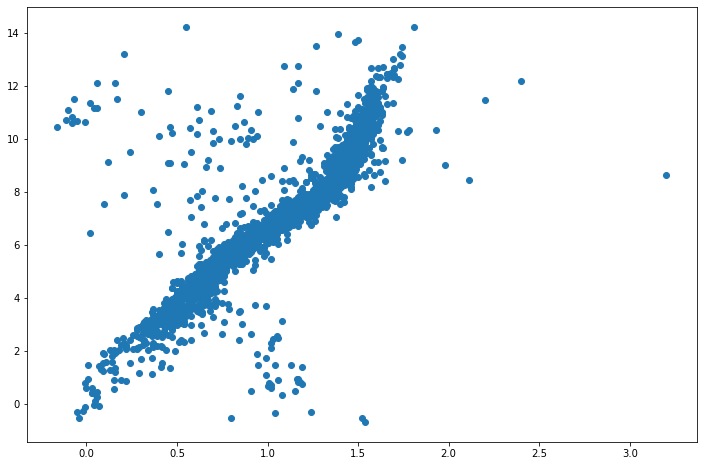

In [7]:
# Empezamos a aprender a plotear con plot de python
#
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]
#
# formas alternativas (obviar)
#plt.plot(hr['B-V'], hr['Mv'], 'bo')
#df.plot(kind='scatter',x='B-V', y='Mv', color='blue')
#
# Notar que utilizo los nombres de las columnas. Y defino como "data" el df (con B-V en formato numérico)
#
plt.scatter('B-V', 'Mv', data=df)
plt.show()

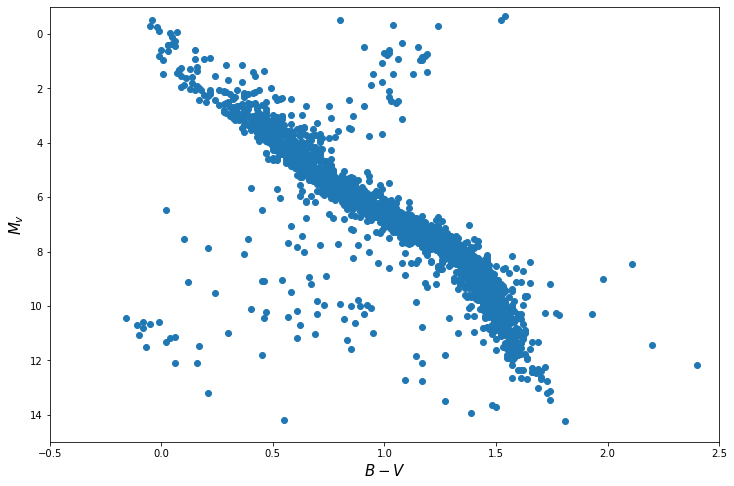

In [8]:
plt.scatter('B-V', 'Mv', data=df)
#
# Agrego labels
#
plt.xlabel(r'$B-V$', fontsize=15)
plt.ylabel(r'$M_v$', fontsize=15)
#
# Defino limites, aprovecho para invertir Mv
#
plt.xlim(-0.5, 2.5)
plt.ylim(15, -1)
plt.show()

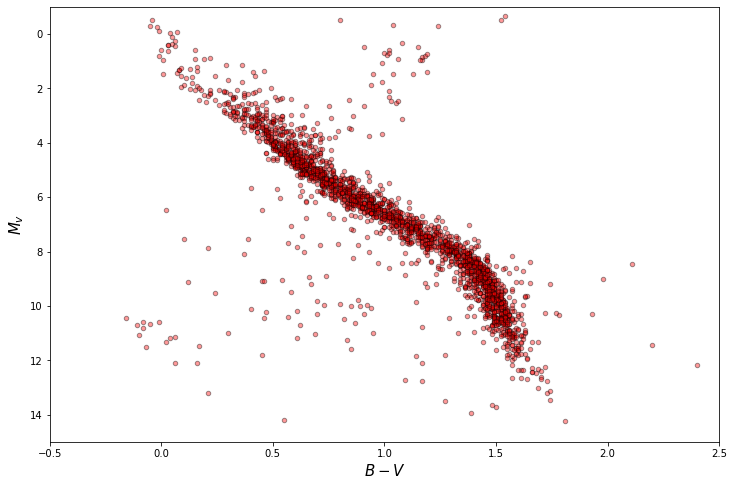

In [9]:
# Un poco de arte refino color (c), tamaño (s), y edgecolors 
#
plt.scatter('B-V', 'Mv', data=df, alpha=0.4, edgecolors='black', c='red', s=20)
plt.xlabel(r'$B-V$', fontsize=15)
plt.ylabel(r'$M_v$', fontsize=15)
plt.xlim(-0.5, 2.5)
plt.ylim(15, -1)
plt.show()

####  Analice cómo varia el radio estelar.

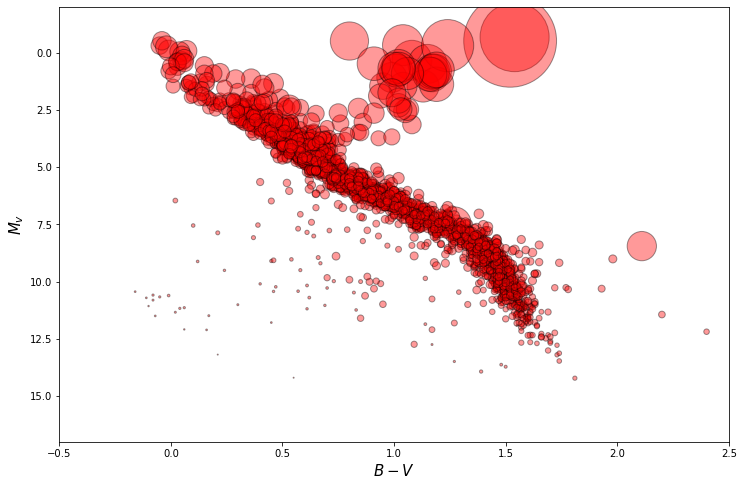

In [10]:
# Vamos a cambiar el tamaño de los símbolos según el radio de la estrella
#
df['radio_modif'] = df['R*(Rsun)']*100
plt.scatter('B-V', 'Mv', data=df, alpha=0.4, edgecolors='black', c='red', s='radio_modif')
plt.xlabel(r'$B-V$', fontsize=15)
plt.ylabel(r'$M_v$', fontsize=15)
plt.xlim(-0.5, 2.5)
plt.ylim(17, -2)
plt.show()

#### Visualice las temperaturas efectivas ($T_{ef}$ ), recordando la correspondencia entre la $T_{ef}$ y el color $B − V$.


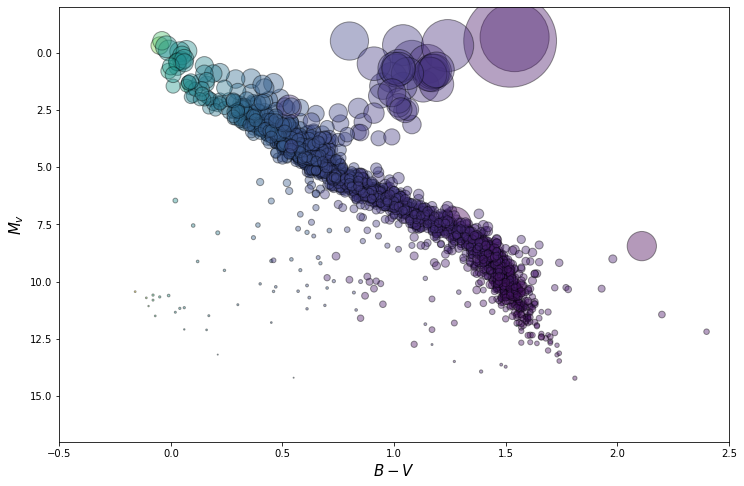

In [11]:
# Al final? el índice de color y la temperatura correlacionan?
#
df['radio_modif'] = df['R*(Rsun)']*100
plt.scatter('B-V', 'Mv', data=df, alpha=0.4, edgecolors='black', c='Teff', s='radio_modif')
plt.xlabel(r'$B-V$', fontsize=15)
plt.ylabel(r'$M_v$', fontsize=15)
plt.xlim(-0.5, 2.5)
plt.ylim(17, -2)
plt.show()

In [12]:
hr['Teff'].describe()

count     2333.000000
mean      4879.582940
std       1253.133893
min       2685.000000
25%       3870.000000
50%       4701.000000
75%       5664.000000
max      15675.000000
Name: Teff, dtype: float64

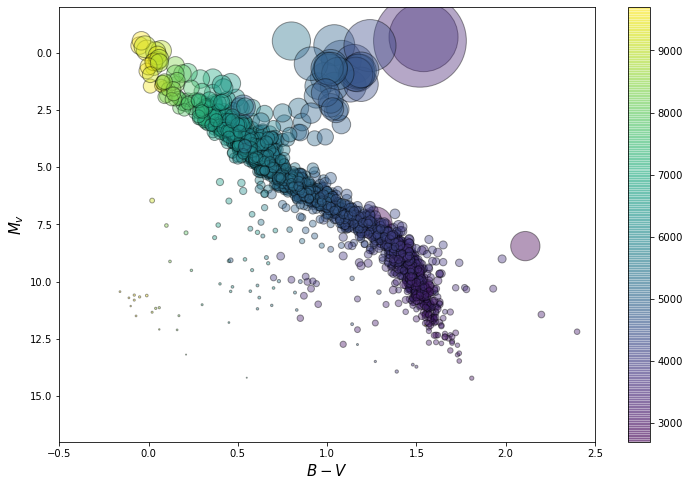

In [13]:
# Defino escala de Teff ad-hoc
#
df['radio_modif'] = df['R*(Rsun)']*100
plt.scatter('B-V', 'Mv', data=df, alpha=0.4, edgecolors='black', c='Teff', s='radio_modif', vmin=2700, vmax=9700)
plt.xlabel(r'$B-V$', fontsize=15)
plt.ylabel(r'$M_v$', fontsize=15)
plt.xlim(-0.5, 2.5)
plt.ylim(17, -2)
plt.colorbar()
plt.show()

#### Realice el diagrama HR teórico: $\log(L/L_\odot)$ vs. $\log(T_{ef})$. Superponga rectas de radio estelar constante.


In [16]:
hr['Lbol'].describe()

count    2333.000000
mean        3.156472
std        24.295511
min         0.000000
25%         0.070000
50%         0.230000
75%         0.940000
max       878.370000
Name: Lbol, dtype: float64

/home/rgamen/.conda/envs/AEpracticas/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


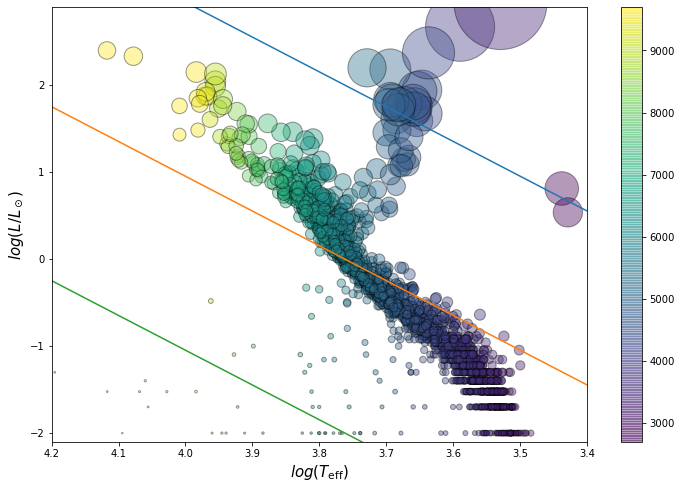

In [17]:
# Hagamos un HR teórico
#
import numpy as np
#
# Calculo log (Teff)
#
df['logteff'] = np.log10(df['Teff'])
#
# Calculo Mbol (es decir, log(L)), pero hago la cuenta solo si Lbol > 0
#
df.loc[df['Lbol'] > 0, 'Mbol'] = np.log10(df['Lbol'])
#
df['radio_modif'] = df['R*(Rsun)']*100
plt.scatter('logteff', 'Mbol', data=df, alpha=0.4, edgecolors='black', c='Teff', s='radio_modif', vmin=2700, vmax=9700)
plt.xlabel(r'$log (T_\mathrm{eff}$)', fontsize=15)
plt.ylabel(r'$log(L/L_\odot)$', fontsize=15)
plt.xlim(4.2, 3.4)
plt.ylim(-2.1, 2.9)
plt.colorbar()
#
# Agrego líneas de  R constante
#
x = np.arange(3.4,4.2,0.1)
radio=10.0
y = 4*x+2*np.log10(radio)-4*np.log10(5778)
plt.plot(x,y)
radio=1.0
y = 4*x+2*np.log10(radio)-4*np.log10(5778)
plt.plot(x,y)
radio=0.1
y = 4*x+2*np.log10(radio)-4*np.log10(5778)
plt.plot(x,y)
plt.show()

####  Se puede definir el HR espectroscópico como un gráfico donde se relacionan parámetros completamente extraíbles de los espectros, i.e. $T_{ef}$ y gravedad superficial ($g$). Así, combinando las ecuaciones de $L$ y $g$, podemos definir una nueva Luminosidad ($\mathcal{L}= L/M$).

#### Obtenga el diagrama HR espectroscópico: $\log(\mathcal{L})$ vs. $\log(T_{ef})$, y superponga rectas de gravedad superficial constantes (Langer y Kudritzki, 2014, A\&A, 564, A52) utilizando:

$L = 4 \pi R^2 \sigma T^4$

$g = \frac{GM}{R^2}$

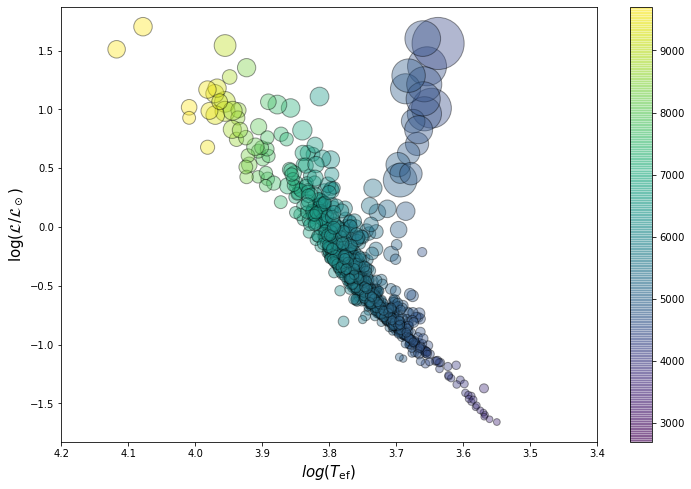

In [30]:
# Hagamos un HR espectroscópico
#
#import numpy as np
#
df['log(g)'] = pd.to_numeric(df['log(g)'], errors='coerce')
df['log(g)'] = df['log(g)'].astype(float)
df['logteff'] = np.log10(df['Teff'])
df['L_sp'] = 4 * df['logteff'] - df['log(g)'] -4*np.log10(5778) + 4.0
#
df['radio_modif'] = df['R*(Rsun)']*100
#plt.scatter('logteff', 'log(g)', data=df, alpha=0.4, edgecolors='black', c='Teff', s='radio_modif', vmin=2700, vmax=9700)
plt.scatter('logteff', 'L_sp', data=df, alpha=0.4, edgecolors='black', c='Teff', s='radio_modif', vmin=2700, vmax=9700)
plt.xlabel(r'$log (T_\mathrm{ef}$)', fontsize=15)
plt.ylabel(r'$\log(\mathcal{L}/\mathcal{L}_\odot)$', fontsize=15)
plt.xlim(4.2, 3.4)
#plt.ylim(5, 1.75)
plt.colorbar()
plt.show()

#### Por último, realice un diagrama $\log(g)$ vs. $\log(T_{ef})$.


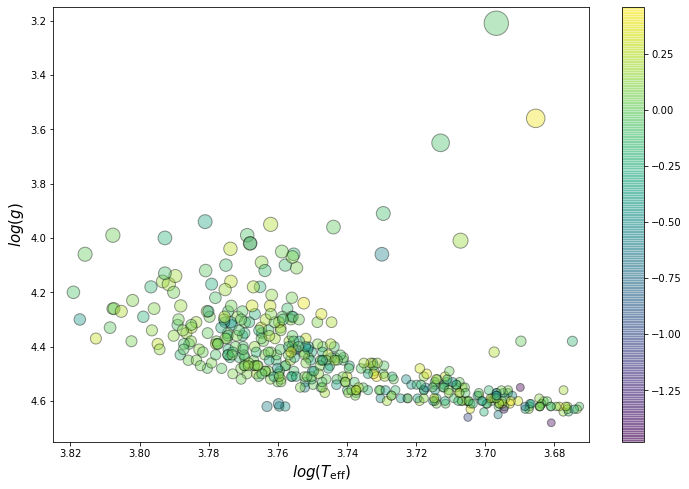

In [23]:
# Hagamos un HR espectroscópico coloreemos por metalicidad
#
df['[Fe/H]-VF05'] = pd.to_numeric(df['[Fe/H]-VF05'], errors='coerce')
df['[Fe/H]-VF05'] = df['[Fe/H]-VF05'].astype(float)
df['log(g)'] = pd.to_numeric(df['log(g)'], errors='coerce')
df['log(g)'] = df['log(g)'].astype(float)
df['logteff'] = np.log10(df['Teff'])
#
df['radio_modif'] = df['R*(Rsun)']*100
plt.scatter('logteff', 'log(g)', data=df, alpha=0.4, edgecolors='black', c='[Fe/H]-VF05', s='radio_modif', vmin=-1.48, vmax=0.46)
plt.xlabel(r'$log (T_\mathrm{eff}$)', fontsize=15)
plt.ylabel(r'$log(g)$', fontsize=15)
plt.xlim(3.825, 3.67)
plt.ylim(4.75, 3.15)
plt.colorbar()
plt.show()

In [0]:
hr['[Fe/H]-VF05'].describe()


count    420.000000
mean      -0.045619
std        0.258605
min       -1.480000
25%       -0.180000
50%        0.000000
75%        0.120000
max        0.460000
Name: [Fe/H]-VF05, dtype: float64